#Backward Euler
Método Euler hacia atrás para aproximación numérica de ecuaciones diferenciales

In [22]:
import math
from math import cos, sin, e, log
import numpy as np
import pandas as pd
import sympy as sp
from sympy import * 
import matplotlib.pyplot as plt
import scipy as sip
from scipy import integrate
from scipy.sparse import spdiags

**Sistema de Ecuaciones**
$\left\{ \begin{array}{lcc}
             y_1'= 9y_1+24y_2+5cost-\frac{1}{3}sint & t\in [0,1] 
             \\ y_2'= -24y_1-51y_2-9cost+\frac{1}{3}sint & t \in [0,1] 
             \\ y_1(0)= \frac{4}{3}, \;\;\; y_2(0)=\frac{2}{3} 
             \end{array}
   \right.$

In [23]:
##Sistema de ecuaciones
def function1(t, y1, y2):
  return 9*y1+24*y2+5*cos(t)-1/3*sin(t)
def function2(t, y1, y2):
  return -24*y1-51*y2-9*cos(t)+1/3*sin(t)

**Solución al PVI** $\left\{ \begin{array}{lcc}
             y_1 = 2e^{-3t}-e^{-39t}+\frac{1}{3}cos(t) & t\in [0,1] 
             \\ y_2= -e^{-3t}+2e^{-39t}-\frac{1}{3}cos(t) & t \in [0,1] 
             \end{array}
   \right.$

In [5]:
#Soluciones
def sol1(t):
  return 2*e**(-3*t)-e**(-39*t)+(1/3)*cos(t)
def sol2(t):
  return (-1)*e**(-3*t)+2*e**(-39*t)-(1/3)*cos(t)
def sol3(x,ep):
  return 1+x+(e**(x/ep)-1)/(e**(1/ep)-1)

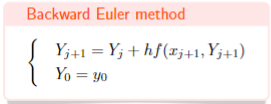


In [26]:
#EULER IMPLÍCITO 
t,y1,y2,y1j,y2j= symbols('t,y1,y2,y1j,y2j')
def BEuler(f1,f2,a,b,y10,y20,M):
  h = (b-a)/M
  X = np.zeros(M+1)
  Y1 = np.zeros(M+1)
  Y2 = np.zeros(M+1)
  Y1[0] = y10
  Y2[0] = y20
  X[0] = a

  f2x= y2j - y2 - h*f2(t,y1j,y2j)
  f2x= solve(f2x,y2j)[0]

  f1x= y1j - y1 - h*f1(t,y1j,y2j)
  f1x= solve(f1x.subs(y2j,f2x),y1j)[0]


  i=0
  while i<M:
    X[i+1]= X[i]+h
    Y1[i+1]= f1x.subs(t,X[i+1]).subs(y1,Y1[i]).subs(y2,Y2[i]) 
    Y2[i+1]= f2x.subs(t,X[i+1]).subs(y1j,Y1[i+1]).subs(y2,Y2[i]) 
    i=i+1
  return X, Y1, Y2

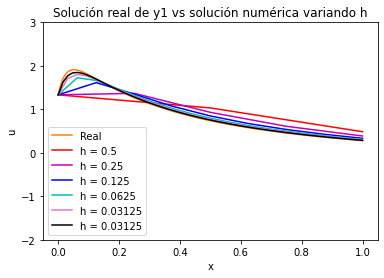

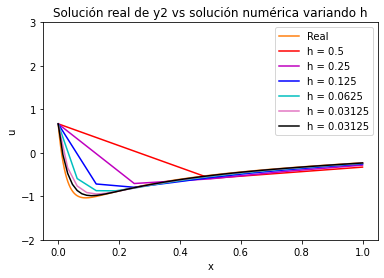

In [27]:
#Gráficar

#Solución real:

x = np.linspace(0,1,1000)
y1real = np.zeros(len(x))
y2real = np.zeros(len(x))
Xp, Y1p, Y2p= BEuler(function1,function2,0,1,4/3,2/3,2)
Xs, Y1s, Y2s= BEuler(function1,function2,0,1,4/3,2/3,4)
Xt, Y1t, Y2t= BEuler(function1,function2,0,1,4/3,2/3,8)
Xc, Y1c, Y2c= BEuler(function1,function2,0,1,4/3,2/3,16)
Xq, Y1q, Y2q = BEuler(function1,function2,0,1,4/3,2/3,32)
Xo, Y1o, Y2o= BEuler(function1,function2,0,1,4/3,2/3,64)

for i in range(len(x)):
  y1real[i] = sol1(x[i])
  y2real[i] = sol2(x[i])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


# plot the function
plt.plot(x,y1real, 'C1')
plt.title('Solución real de y1 vs solución numérica variando h')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(Xp,Y1p, 'r')
plt.plot(Xs,Y1s, 'm')
plt.plot(Xt,Y1t, 'b')
plt.plot(Xc,Y1c, 'c')
plt.plot(Xq,Y1q, 'C6')
plt.plot(Xo,Y1o, 'k')
plt.ylim(top = 3, bottom = -2)
plt.legend(["Real", "h = "+ str(2**(-1)), "h = "+ str(2**(-2)), "h = "+ str(2**(-3)), "h = "+ str(2**(-4)),"h = "+ str(2**(-5)) ,"h = "+ str(2**(-5))], loc ="lower left")
plt.show()

plt.plot(x,y2real, 'C1')
plt.title('Solución real de y2 vs solución numérica variando h')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(Xp,Y2p, 'r')
plt.plot(Xs,Y2s, 'm')
plt.plot(Xt,Y2t, 'b')
plt.plot(Xc,Y2c, 'c')
plt.plot(Xq,Y2q, 'C6')
plt.plot(Xo,Y2o, 'k')
plt.ylim(top = 3, bottom = -2)
plt.legend(["Real", "h = "+ str(2**(-1)), "h = "+ str(2**(-2)), "h = "+ str(2**(-3)), "h = "+ str(2**(-4)),"h = "+ str(2**(-5)) ,"h = "+ str(2**(-5))], loc ="upper right")
plt.show() 

In [28]:
#Calcular error
def error(fun1, fun2,sol1, sol2,a,b,y10,y20,M):
  Error1= np.zeros(M+1)
  Error2= np.zeros(M+1)
  h = (a-b)/M
  X, Y1, Y2 = BEuler(fun1, fun2, a, b, y10, y20, M)
  Datos=[]
  i = 0
  while i<=M:
    Error1[i] = abs(Y1[i]-sol1(X[i]))
    Error2[i] = abs(Y2[i]-sol2(X[i]))
    Datos.append([X[i],Y1[i],Error1[i],Y2[i],Error2[i]])
    i = i+1
  Datos = pd.DataFrame(Datos).set_axis(['X','Y1','Error Y1','Y2','Error Y2'], axis=1)
  ## Error
  error = 0
  for i in range(1,M+1):
    l1i = lambda x: Y1[i-1]+((x-X[i-1])/h)*(Y1[i]-Y1[i-1])
    l2i =  lambda x: Y2[i-1]+((x-X[i-1])/h)*(Y2[i]-Y2[i-1])
    integrando = lambda x: (sol1(x)-l1i(x))**2 + (sol2(x)-l2i(x))**2
    integral= integrate.quad(integrando, X[i-1], X[i])
    error = error + integral[0]
  error = sqrt(error)
  return error

In [29]:
def alpha():
  Errorh = np.zeros(6)
  hs = np.zeros(6)
  alphas = np.zeros(6)
  Datos = []
  M = 2
  Errorh[0] = error(function1,function2,sol1,sol2,0,1,4/3,2/3,M)
  hs[0] = 1/M
  Datos.append([hs[0],Errorh[0],nan])
  for i in range(1,6):
    M=M*2
    h = 1/M
    Errorh[i] = error(function1,function2,sol1,sol2,0,1,4/3,2/3,M)
    hs[i] = h
    alphas[i] = log(Errorh[i]/Errorh[i-1])/log(hs[i]/hs[i-1])
    Datos.append([hs[i],Errorh[i],alphas[i]])
  Datos = pd.DataFrame(Datos).set_axis(['h','Eh','alpha'], axis=1) 
  return Datos,Errorh, hs

In [30]:
Datos, errorh, hs = alpha()
Datos

,h,Eh,alpha
0,0.500000,1.648463,nan
1,0.250000,1.253517,0.39514
2,0.125000,0.886243,0.500208
3,0.062500,0.567733,0.64249
4,0.031250,0.330886,0.778878
5,0.015625,0.180772,0.872161


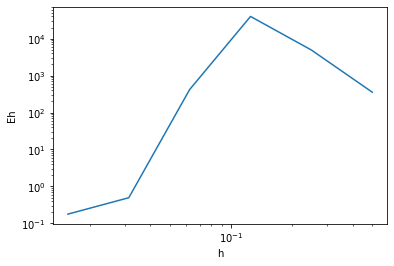

In [25]:
##Gráficas loglog
plt.loglog(hs,errorh)
plt.xlabel('h')
plt.ylabel('Eh')
plt.show()